In [103]:
import pandas as pd
from iminuit import Minuit 
from iminuit.cost import LeastSquares
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2


In [104]:
def retta (x,a,b):
    return (a*x + b)

def sqrt(x, a, b):
    return np.sqrt(a*x + b)

In [105]:
def read():
    Z1 = pd.read_csv('F_Vb.CSV')
    Y = []
    S = []
    for i in range(len(Z1.columns.values)):
        if i != 0:
            z = Z1.iloc[:, i]
            y = float(np.mean(z))
            Y.append(y)
            s = float(np.std(z))
            S.append(s)
    return (Y, S)

In [106]:
def ax_x (S, Y, E):
    X = [52.5, 53, 53.5, 53.8, 54, 54.3, 54.5, 54.8, 55, 55.3, 55.5, 55.8, 56]
    E1 = []
    X1 = []
    Y1 = []
    for i in range(len(X)):
        if Y[i] > S:
            X1.append(X[i])
            Y1.append(Y[i])
            E1.append(E[i])
    return X1, Y1, E1

In [107]:
def graph(X, Y, S, a, b):
    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    #plt.plot(np.linspace(51, 56, 100000), sqrt(np.linspace(51, 56, 100000), a, b), label = 'Funzione di interpolazione')
    ax.set_xlabel("Threshold[mV]")
    ax.set_ylabel("Frequency[kHz]")
    ax.scatter(X, Y, color = 'black', label = 'Dati sperimentali')
    ax.errorbar(Y, Y, S)
    ax.legend()
    plt.show()


In [108]:
def analisi_sqrt(X, Y, S):

    L_S = LeastSquares(X, Y, S, sqrt)
    my_minuit = Minuit (L_S, a = 40, b = 1000)  
    my_minuit.migrad () 
    my_minuit.hesse ()   

#validità
    V = my_minuit.valid
    print('Validità: ', V)
    Q_squared = my_minuit.fval
    print ('Q-squared: ', Q_squared)
    N_dof = my_minuit.ndof
    print ('DOF: ', N_dof)
    p_v = 1 - chi2.cdf(Q_squared, N_dof)
    print('P value: ', p_v )

#valori dell'interpolazione
    a_f = my_minuit.values[0]
    b_f = my_minuit.values[1]

#visualizzazione 
    display(my_minuit)
    return (a_f, b_f)

def analisi_retta(X,Y,S):
    L_S = LeastSquares(Y, np.sqrt(X), S, retta)
    my_minuit = Minuit (L_S, a = 40, b = 500)  
    my_minuit.migrad () 
    my_minuit.hesse ()   

#validità
    V = my_minuit.valid
    print('Validità: ', V)
    Q_squared = my_minuit.fval
    print ('Q-squared: ', Q_squared)
    N_dof = my_minuit.ndof
    print ('DOF: ', N_dof)
    p_v = 1 - chi2.cdf(Q_squared, N_dof)
    print('P value: ', p_v )

#valori dell'interpolazione
    a_f = my_minuit.values[0]
    b_f = my_minuit.values[1]

#visualizzazione 
    display(my_minuit)
    return (a_f, b_f)

In [109]:
Y = read()
X = ax_x(0.3, Y[0], Y[1])
Z = analisi_sqrt(X[0], X[1], X[2])
print('a = ', Z[0])
print('b = ', Z[1])

Validità:  False
Q-squared:  8478.391020622017
DOF:  9.0
P value:  0.0


C:\Users\matte\AppData\Local\Temp\ipykernel_19444\666845519.py:5: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(a*x + b)


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 8478 (χ²/ndof = 942.0)     │             Nfcn = 2038              │
│ EDM = 5.41e+04 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │ 5.24956e3 │ 0.00008e3 │            │            │         │         │       │
│ 1 │ b    │-280.840e3 │  0.004e3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────┐
│   │       a       b │
├───┼─────────────────┤
│ a │ 0.00582  -0.306 │
│ b │  -0.306    16.6 │
└───┴─────────────────┘

a =  5249.55737439157
b =  -280840.46823225723


5249.55737439157 -280840.46823225723


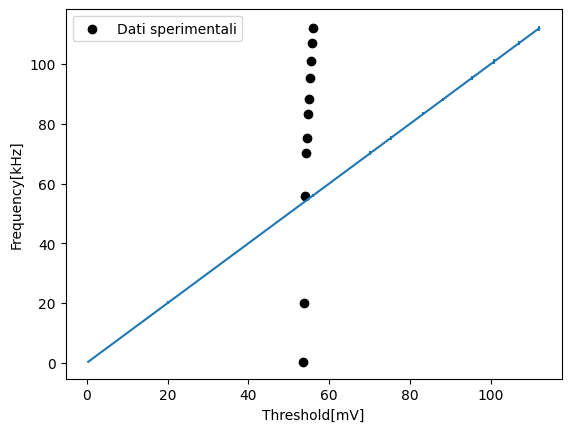

In [110]:
print(Z[0], Z[1])
graph(X[0], X[1], X[2], Z[0], Z[1])

In [111]:
Z2 = analisi_retta(X[0], X[1], X[2])
print('a = ', Z2[0])
print('b = ', Z2[1])

Validità:  True
Q-squared:  0.011767928672368545
DOF:  9.0
P value:  0.9999999999982518


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.01177 (χ²/ndof = 0.0)    │              Nfcn = 49               │
│ EDM = 3.68e-20 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  0.0012   │  0.0025   │            │            │         │         │       │
│ 1 │ b    │   7.31    │   0.04    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 6.14e-06   -20e-6 │
│ b │   -20e-6   0.0015 │
└───┴───────────────────┘

a =  0.0011865056451412226
b =  7.313775235835635


In [112]:
def intercetta():
    G = [[], []]
    X = np.linspace(40, 56, 100000000)
    for i in range(len(X)):
        y = float(retta(X[i], Z, Z))  # Use Z directly as a scalar
        if y <= 0.00001:
             if  y >= -0.00001:
                G[0].append(X[i]) 
                G[1].append(y)
    return G
#F = intercetta()
#print('Intercetta: ', Z)  # Z is already a scalar
#print('Errore: ', 0)  # No standard deviation for a scalar
